# LCO study speed 95 m/s

This is an example using SHARPy




## Required Packages

In [33]:
# Loading of the used packages
import numpy as np              # basic mathematical and array functions
import os                       # Functions related to the operating system
import matplotlib.pyplot as plt # Plotting library

import sharpy.sharpy_main                  # Run SHARPy inside jupyter notebooks
import sharpy.utils.plotutils as pu        # Plotting utilities
from sharpy.utils.constants import deg2rad # Constant to conver degrees to radians

import sharpy.utils.generate_cases as gc

## Problem Set-up

### Velocity

The UVLM is assembled in normalised time at a velocity of $1 m/s$. The only matrices that need updating then with free stream velocity are the structural matrices, which is significantly cheaper to do than to update the UVLM.

In [34]:
! pip install plotly

In [36]:
# Geometry
chord = 1.         # Chord of the wing
aspect_ratio = 16. # Ratio between lenght and chord: aspect_ratio = length/chord
wake_length = 25   # Length of the wake in chord lengths

# Discretization
num_node = 11           # Number of nodes in the structural discretisation
                        # The number of nodes will also define the aerodynamic panels in the
                        # spanwise direction
num_chord_panels = 2    # Number of aerodynamic panels in the chordwise direction
num_points_camber = 100 # The camber line of the wing will be defined by a series of (x,y)
                        # coordintes. Here, we define the size of the (x,y) vectors

# Structural properties of the beam cross section
mass_per_unit_length = 0.75 # Mass per unit length
mass_iner_x = 0.1           # Mass inertia around the local x axis
mass_iner_y = 0.05          # Mass inertia around the local y axis
mass_iner_z = 0.05          # Mass inertia around the local z axis
pos_cg_B = np.zeros((3))    # position of the centre of mass with respect to the elastic axis
EA = 1e7                    # Axial stiffness
GAy = 1e6                   # Shear stiffness in the local y axis
GAz = 1e6                   # Shear stiffness in the local z axis
GJ = 3e5                    # Torsional stiffness
EIy = 6e5                   # Bending stiffness around the flapwise direction
EIz = 1.5e8                   # Bending stiffness around the edgewise direction

# Operation
WSP = 95.             # Wind speed
air_density = 0.1      # Air density

# Time discretization
end_time = 5.0                  # End time of the simulation
dt = chord/num_chord_panels/WSP # Always keep one timestep per panel



In [37]:
aoa_ini_deg = 4.        # Angle of attack at the beginning of the simulation
aoa_end_deg = 1.        # Angle of attack at the end of the simulation

In [38]:
wing = gc.AeroelasticInformation()

In [39]:
wing.StructuralInformation.__dict__.keys()

dict_keys(['num_node_elem', 'num_node', 'num_elem', 'coordinates', 'connectivities', 'elem_stiffness', 'stiffness_db', 'elem_mass', 'mass_db', 'frame_of_reference_delta', 'structural_twist', 'boundary_conditions', 'beam_number', 'body_number', 'app_forces', 'lumped_mass_nodes', 'lumped_mass', 'lumped_mass_inertia', 'lumped_mass_position', 'lumped_mass_mat', 'lumped_mass_mat_nodes'])

In [41]:
# Define the number of nodes and the number of nodes per element
wing.StructuralInformation.num_node = num_node
wing.StructuralInformation.num_node_elem = 3
# Compute the number of elements assuming basic connections
wing.StructuralInformation.compute_basic_num_elem()

In [42]:
# Generate an array with the location of the nodes
node_r = np.zeros((num_node, 3))
node_r[:,1] = np.linspace(0, chord*aspect_ratio, num_node)

[[ 0.   0.   0. ]
 [ 0.   1.6  0. ]
 [ 0.   3.2  0. ]
 [ 0.   4.8  0. ]
 [ 0.   6.4  0. ]
 [ 0.   8.   0. ]
 [ 0.   9.6  0. ]
 [ 0.  11.2  0. ]
 [ 0.  12.8  0. ]
 [ 0.  14.4  0. ]
 [ 0.  16.   0. ]]


In [43]:
wing.StructuralInformation.generate_uniform_beam(node_r,
                    mass_per_unit_length,
                    mass_iner_x,
                    mass_iner_y,
                    mass_iner_z,
                    pos_cg_B,
                    EA,
                    GAy,
                    GAz,
                    GJ,
                    EIy,
                    EIz,
                    num_node_elem = wing.StructuralInformation.num_node_elem,
                    y_BFoR = 'x_AFoR',
                    num_lumped_mass=0)

In [44]:
# print(wing.StructuralInformation.connectivities)

[[ 0  2  1]
 [ 2  4  3]
 [ 4  6  5]
 [ 6  8  7]
 [ 8 10  9]]


In [45]:
wing.StructuralInformation.boundary_conditions[0] = 1
wing.StructuralInformation.boundary_conditions[-1] = -1

In [46]:
# Compute the number of panels in the wake (streamwise direction) based on the previous paramete
wake_panels = int(wake_length*chord/dt)

# Define the coordinates of the camber line of the wing
wing_camber = np.zeros((1, num_points_camber, 2))
wing_camber[0, :, 0] = np.linspace(0, 1, num_points_camber)



In [47]:
# Generate blade aerodynamics
wing.AerodynamicInformation.create_one_uniform_aerodynamics(wing.StructuralInformation,
                                 chord = chord,
                                 twist = 0.,
                                 sweep = 0.,
                                 num_chord_panels = num_chord_panels,
                                 m_distribution = 'uniform',
                                 elastic_axis = 0.5,
                                 num_points_camber = num_points_camber,
                                 airfoil = wing_camber)

In [48]:
# Gather data about available solvers
SimInfo = gc.SimulationInformation() # Initialises the SimulationInformation class
SimInfo.set_default_values()         # Assigns the default values to all the solvers

# Print the available solvers and postprocessors
# for key in SimInfo.solvers.keys():
#     print(key)



_BaseStructural
AerogridLoader
BeamLoader
DynamicCoupled
DynamicUVLM
LinDynamicSim
LinearAssembler
Modal
NoAero
NonLinearDynamic
NonLinearDynamicCoupledStep
NonLinearDynamicMultibody
NonLinearDynamicPrescribedStep
NonLinearStatic
PrescribedUvlm
RigidDynamicCoupledStep
RigidDynamicPrescribedStep
StaticCoupled
StaticCoupledRBM
StaticTrim
StaticUvlm
StepLinearUVLM
StepUvlm
_BaseTimeIntegrator
NewmarkBeta
GeneralisedAlpha
Trim
UDPout
SHARPy
SaveData
StabilityDerivatives
Cleanup
FrequencyResponse
LiftDistribution
PickleData
WriteVariablesTime
BeamLoads
AsymptoticStability
AeroForcesCalculator
AerogridPlot
StallCheck
PlotFlowField
BeamPlot
SaveParametricCase
HelicoidalWake
TurbVelocityFieldBts
TrajectoryGenerator
FloatingForces
TurbVelocityField
ShearVelocityField
StraightWake
ModifyStructure
DynamicControlSurface
SteadyVelocityField
GridBox
GustVelocityField
BumpVelocityField
PolarCorrection
EfficiencyCorrection


In [49]:
SimInfo.solvers['BeamLoader']



{'unsteady': True, 'orientation': [1.0, 0, 0, 0], 'for_pos': [0.0, 0, 0]}

In [50]:
SimInfo.solvers['SHARPy']['flow'] = ['BeamLoader',
                        'AerogridLoader']

SimInfo.solvers['SHARPy']['case'] = 'plot'
SimInfo.solvers['SHARPy']['route'] = './'
SimInfo.solvers['SHARPy']['write_screen'] = 'off'



In [51]:
SimInfo.solvers['AerogridLoader']['unsteady'] = 'on'
SimInfo.solvers['AerogridLoader']['mstar'] = wake_panels
SimInfo.solvers['AerogridLoader']['freestream_dir'] = np.array([1.,0.,0.])
SimInfo.solvers['AerogridLoader']['wake_shape_generator'] = 'StraightWake'
SimInfo.solvers['AerogridLoader']['wake_shape_generator_input'] = {'u_inf': WSP,
                                                                   'u_inf_direction' : np.array(
                                                                                         [np.cos(aoa_ini_deg*deg2rad),
                                                                                         0.,
                                                                                         np.sin(aoa_ini_deg*deg2rad)]),
                                                                   'dt': dt}



In [52]:
gc.clean_test_files(SimInfo.solvers['SHARPy']['route'], SimInfo.solvers['SHARPy']['case'])
wing.generate_h5_files(SimInfo.solvers['SHARPy']['route'], SimInfo.solvers['SHARPy']['case'])
SimInfo.generate_solver_file()

In [53]:
sharpy_output = sharpy.sharpy_main.main(['',
                                         SimInfo.solvers['SHARPy']['route'] +
                                         SimInfo.solvers['SHARPy']['case'] +
                                         '.sharpy'])



fatal: not a git repository (or any of the parent directories): .git


In [54]:
#pu.plot_timestep(sharpy_output, tstep=-1, minus_mstar=(wake_panels - 6), plotly=True)

In [55]:
# Define the simulation
SimInfo.solvers['SHARPy']['flow'] = ['BeamLoader',
                        'AerogridLoader',
                        'StaticCoupled']

SimInfo.set_variable_all_dicts('rho', air_density)

SimInfo.solvers['SHARPy']['case'] = 'static'
SimInfo.solvers['SHARPy']['write_screen'] = 'on'

SimInfo.solvers['NonLinearStatic']['gravity_on'] = False

SimInfo.solvers['StaticUvlm']['horseshoe'] = True
SimInfo.solvers['StaticUvlm']['n_rollup'] = 0
SimInfo.solvers['StaticUvlm']['velocity_field_generator'] = 'SteadyVelocityField'
SimInfo.solvers['StaticUvlm']['velocity_field_input'] = {'u_inf' : WSP,
                                                         'u_inf_direction' : np.array(
                                                                                [np.cos(aoa_ini_deg*deg2rad),
                                                                                 0.,
                                                                                 np.sin(aoa_ini_deg*deg2rad)])}

SimInfo.solvers['StaticCoupled']['structural_solver'] = 'NonLinearStatic'
SimInfo.solvers['StaticCoupled']['structural_solver_settings'] = SimInfo.solvers['NonLinearStatic']
SimInfo.solvers['StaticCoupled']['aero_solver'] = 'StaticUvlm'
SimInfo.solvers['StaticCoupled']['aero_solver_settings'] = SimInfo.solvers['StaticUvlm']
SimInfo.solvers['StaticCoupled']['n_load_steps'] = 0


In [56]:
gc.clean_test_files(SimInfo.solvers['SHARPy']['route'], SimInfo.solvers['SHARPy']['case'])
SimInfo.generate_solver_file()
wing.generate_h5_files(SimInfo.solvers['SHARPy']['route'], SimInfo.solvers['SHARPy']['case'])

In [57]:
# Running SHARPy again inside jupyter
sharpy_output = sharpy.sharpy_main.main(['',
                                         SimInfo.solvers['SHARPy']['route'] +
                                         SimInfo.solvers['SHARPy']['case'] +
                                         '.sharpy'])

--------------------------------------------------------------------------------
            ######  ##     ##    ###    ########  ########  ##    ##
           ##    ## ##     ##   ## ##   ##     ## ##     ##  ##  ##
           ##       ##     ##  ##   ##  ##     ## ##     ##   ####
            ######  ######### ##     ## ########  ########     ##
                 ## ##     ## ######### ##   ##   ##           ##
           ##    ## ##     ## ##     ## ##    ##  ##           ##
            ######  ##     ## ##     ## ##     ## ##           ##
--------------------------------------------------------------------------------
Aeroelastics Lab, Aeronautics Department.
    Copyright (c), Imperial College London.
    All rights reserved.
    License available at https://github.com/imperialcollegelondon/sharpy
Running SHARPy from /home/jesusgp/sharpy/docs/source/content/example_notebooks/HALE_wing
SHARPy being run is in /home/jesusgp/anaconda3/envs/sharpy_env/lib/python3.7/site-packages
SHARPy

fatal: not a git repository (or any of the parent directories): .git


Generating an instance of StaticCoupled
Generating an instance of NonLinearStatic
Generating an instance of StaticUvlm



|=====|=====|============|==========|==========|==========|==========|==========|==========|
|iter |step | log10(res) |    Fx    |    Fy    |    Fz    |    Mx    |    My    |    Mz    |
|=====|=====|============|==========|==========|==========|==========|==========|==========|
                      DeltaF      DeltaX         Res      ResRel      ResFrc   ResRelFrc      ResMmt   ResRelMmt         ErX       ErPos       ErPsi
LoadStep Subiter      DeltaF     DeltaX          Res      ResRel      ResFrc   ResRelFrc      ResMmt   ResRelMmt         ErX       ErPos       ErPsi
|  0  |  0  |  0.00000   |-153.0779 |-496.2513 |3016.7163 |24413.4593| 599.2958 |1259.4229 |
                      DeltaF      DeltaX         Res      ResRel      ResFrc   ResRelFrc      ResMmt   ResRelMmt         ErX       ErPos       ErPsi
LoadStep Subiter      DeltaF     DeltaX          Res      R

In [58]:
# pu.plot_timestep(sharpy_output, tstep=-1, minus_mstar=(wake_panels-6), plotly=True)


In [59]:
SimInfo.solvers['SHARPy']['flow'] = ['BeamLoader',
                        'AerogridLoader',
                        'StaticCoupled',
                        'DynamicCoupled']

SimInfo.solvers['SHARPy']['route'] = './'
SimInfo.solvers['SHARPy']['case'] = 'dynamic'

In [60]:
# Compute the number of time steps needed based on the previous parameters
time_steps = int(end_time/dt)

# Define the time step and the number of time steps in every solver that requires them as input
SimInfo.set_variable_all_dicts('dt', dt)
SimInfo.define_num_steps(time_steps)

In [61]:
SimInfo.solvers['StepUvlm']['convection_scheme'] = 2
SimInfo.solvers['StaticUvlm']['velocity_field_generator'] = 'SteadyVelocityField'
SimInfo.solvers['StepUvlm']['velocity_field_input'] = {'u_inf' : WSP,
                                                       'u_inf_direction' : np.array(
                                                                              [np.cos(aoa_end_deg*deg2rad),
                                                                               0.,
                                                                               np.sin(aoa_end_deg*deg2rad)])}

SimInfo.solvers['NonLinearDynamicPrescribedStep']['gravity_on'] = False

SimInfo.solvers['DynamicCoupled']['structural_solver'] = 'NonLinearDynamicPrescribedStep'
SimInfo.solvers['DynamicCoupled']['structural_solver_settings'] = SimInfo.solvers['NonLinearDynamicPrescribedStep']
SimInfo.solvers['DynamicCoupled']['aero_solver'] = 'StepUvlm'
SimInfo.solvers['DynamicCoupled']['aero_solver_settings'] = SimInfo.solvers['StepUvlm']
SimInfo.solvers['DynamicCoupled']['postprocessors'] = ['BeamPlot', 'AerogridPlot']
SimInfo.solvers['DynamicCoupled']['postprocessors_settings'] = {'BeamPlot': SimInfo.solvers['BeamPlot'],
                                                             'AerogridPlot': SimInfo.solvers['AerogridPlot']}


In [62]:
SimInfo.with_forced_vel = True
SimInfo.for_vel = np.zeros((time_steps,6), dtype=float)
SimInfo.for_acc = np.zeros((time_steps,6), dtype=float)
SimInfo.with_dynamic_forces = True
SimInfo.dynamic_forces = np.zeros((time_steps,wing.StructuralInformation.num_node,6),
                                  dtype=float)



In [63]:
gc.clean_test_files(SimInfo.solvers['SHARPy']['route'], SimInfo.solvers['SHARPy']['case'])
wing.generate_h5_files(SimInfo.solvers['SHARPy']['route'], SimInfo.solvers['SHARPy']['case'])
SimInfo.generate_solver_file()
SimInfo.generate_dyn_file(time_steps)

In [32]:
sharpy_output = sharpy.sharpy_main.main(['',
                                         SimInfo.solvers['SHARPy']['route'] +
                                         SimInfo.solvers['SHARPy']['case'] +
                                         '.sharpy'])

--------------------------------------------------------------------------------
            ######  ##     ##    ###    ########  ########  ##    ##
           ##    ## ##     ##   ## ##   ##     ## ##     ##  ##  ##
           ##       ##     ##  ##   ##  ##     ## ##     ##   ####
            ######  ######### ##     ## ########  ########     ##
                 ## ##     ## ######### ##   ##   ##           ##
           ##    ## ##     ## ##     ## ##    ##  ##           ##
            ######  ##     ## ##     ## ##     ## ##           ##
--------------------------------------------------------------------------------
Aeroelastics Lab, Aeronautics Department.
    Copyright (c), Imperial College London.
    All rights reserved.
    License available at https://github.com/imperialcollegelondon/sharpy
Running SHARPy from /home/jesusgp/sharpy/docs/source/content/example_notebooks/HALE_wing
SHARPy being run is in /home/jesusgp/anaconda3/envs/sharpy_env/lib/python3.7/site-packages
SHARPy

fatal: not a git repository (or any of the parent directories): .git


Generating an instance of StaticCoupled
Generating an instance of NonLinearStatic
Generating an instance of StaticUvlm



|=====|=====|============|==========|==========|==========|==========|==========|==========|
|iter |step | log10(res) |    Fx    |    Fy    |    Fz    |    Mx    |    My    |    Mz    |
|=====|=====|============|==========|==========|==========|==========|==========|==========|
                      DeltaF      DeltaX         Res      ResRel      ResFrc   ResRelFrc      ResMmt   ResRelMmt         ErX       ErPos       ErPsi
LoadStep Subiter      DeltaF     DeltaX          Res      ResRel      ResFrc   ResRelFrc      ResMmt   ResRelMmt         ErX       ErPos       ErPsi
|  0  |  0  |  0.00000   |-153.0779 |-496.2513 |3016.7163 |24413.4593| 599.2958 |1259.4229 |
                      DeltaF      DeltaX         Res      ResRel      ResFrc   ResRelFrc      ResMmt   ResRelMmt         ErX       ErPos       ErPsi
LoadStep Subiter      DeltaF     DeltaX          Res      R

KeyboardInterrupt: 

In [ ]:
pu.plot_timestep(sharpy_output, tstep=-400, minus_mstar=(wake_panels-6), plotly=True)

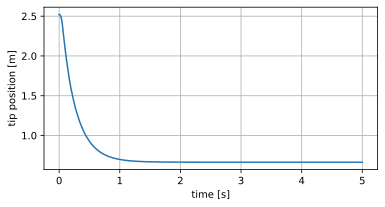

In [ ]:
time = np.linspace(0, dt*time_steps, time_steps)
tip_pos = np.zeros((time_steps))
for it in range(time_steps):
    tip_pos[it] = sharpy_output.structure.timestep_info[it].pos[-1, 2]

fig, plots = plt.subplots(1, 1, figsize=(6, 3))

plots.grid()
plots.set_xlabel("time [s]")
plots.set_ylabel("tip position [m]")
plots.plot(time, tip_pos, '-')

plt.show()



In [ ]:
print(sharpy_output.structure.timestep_info)

[<sharpy.utils.datastructures.StructTimeStepInfo object at 0x7fdb6b728650>, <sharpy.utils.datastructures.StructTimeStepInfo object at 0x7fdb6b72ef90>, <sharpy.utils.datastructures.StructTimeStepInfo object at 0x7fdb683f8350>, <sharpy.utils.datastructures.StructTimeStepInfo object at 0x7fdb683c3d10>, <sharpy.utils.datastructures.StructTimeStepInfo object at 0x7fdb68421650>, <sharpy.utils.datastructures.StructTimeStepInfo object at 0x7fdb68524d50>, <sharpy.utils.datastructures.StructTimeStepInfo object at 0x7fdb683e6dd0>, <sharpy.utils.datastructures.StructTimeStepInfo object at 0x7fdb683b9a10>, <sharpy.utils.datastructures.StructTimeStepInfo object at 0x7fdb6840dc10>, <sharpy.utils.datastructures.StructTimeStepInfo object at 0x7fdb68519e50>, <sharpy.utils.datastructures.StructTimeStepInfo object at 0x7fdb6857a150>, <sharpy.utils.datastructures.StructTimeStepInfo object at 0x7fdb6840d050>, <sharpy.utils.datastructures.StructTimeStepInfo object at 0x7fdb68453d50>, <sharpy.utils.datastruct